<h2><strong>Question 1: Use yfinance to Extract Stock Data</strong></h2>

In [12]:
import yfinance as yf

In [13]:
# Extract stock data for Tesla
tesla_data = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [14]:
# Reset the index
tesla_data = tesla_data.reset_index()

In [15]:
# Display the first five rows
print(tesla_data.head())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


<h2><strong>Question 2: Use Webscraping to Extract Tesla Revenue DATA</strong></h2>

In [28]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

In [29]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)
content = response.content

In [30]:
soup = BeautifulSoup(content, 'html.parser')

In [31]:
revenue_table = soup.find('table', {'class': 'historical_data_table'})

In [32]:
revenue_data = []
rows = revenue_table.find_all('tr')
for row in rows[1:]:
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    revenue_data.append([date, revenue])

In [33]:
print(tabulate(revenue_data[:5], headers=['Date', 'Revenue'], tablefmt='grid'))

+--------+-----------+
|   Date | Revenue   |
+========+===========+
|   2022 | $81,462   |
+--------+-----------+
|   2021 | $53,823   |
+--------+-----------+
|   2020 | $31,536   |
+--------+-----------+
|   2019 | $24,578   |
+--------+-----------+
|   2018 | $21,461   |
+--------+-----------+


<h2><strong>Question 3: Use yfinance to Extract Stock Data</strong></h2>

In [17]:
import yfinance as yf

In [18]:
gme_data = yf.download("GME", start="2022-01-01", end="2023-07-10")

[*********************100%***********************]  1 of 1 completed


In [19]:
gme_data.reset_index(inplace=True)

In [20]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,37.307499,39.845001,37.302502,38.209999,38.209999,5654800
1,2022-01-04,38.042500,38.247501,35.762501,37.227501,37.227501,7339600
2,2022-01-05,37.097500,37.212502,32.287498,32.342499,32.342499,13585600
3,2022-01-06,33.209999,34.424999,30.285000,32.757500,32.757500,24206000
4,2022-01-07,39.942501,40.077499,33.125000,35.154999,35.154999,48549200


<h2><strong>Question 4: Use Webscraping to Extract GME Revenue Data</strong></h2>

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [22]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
content = response.content

In [23]:
soup = BeautifulSoup(content, 'html.parser')

In [24]:
revenue_table = soup.find('table', {'class': 'historical_data_table'})

In [25]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

In [26]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in revenue_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip().replace(',', '')
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

In [27]:
gme_revenue.tail()

,Date,Revenue
10,2013,$8887
11,2012,$9551
12,2011,$9474
13,2010,$9078
14,2009,$8806


<h2><strong>Question 5: Plot Tesla Stock Graph</strong></h2>

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt

In [40]:
# Extract stock data for Tesla
tesla_data = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [41]:
# Reset the index
tesla_data = tesla_data.reset_index()

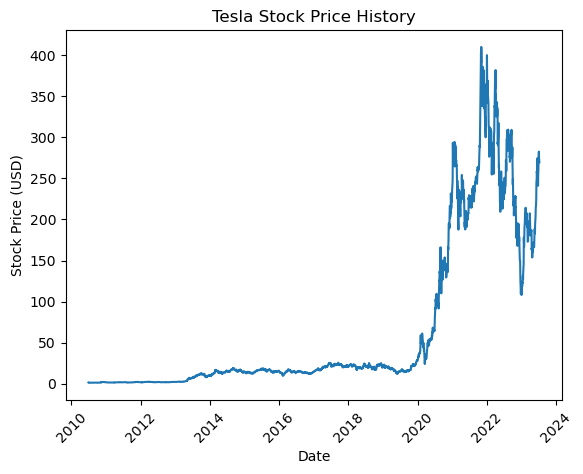

In [46]:
# Plotting the graph
plt.plot(tesla_data['Date'], tesla_data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price History')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.show()

<h2><strong>Question 6: Plot GameStop Stock Graph</strong></h2>

In [47]:
import yfinance as yf
import matplotlib.pyplot as plt

In [48]:
# Download GameStop stock data from Yahoo Finance
gme_data = yf.download("GME", start="2022-01-01", end="2023-07-10")

[*********************100%***********************]  1 of 1 completed


In [49]:
# Reset the index to use the 'Date' column as a regular column
gme_data.reset_index(inplace=True)

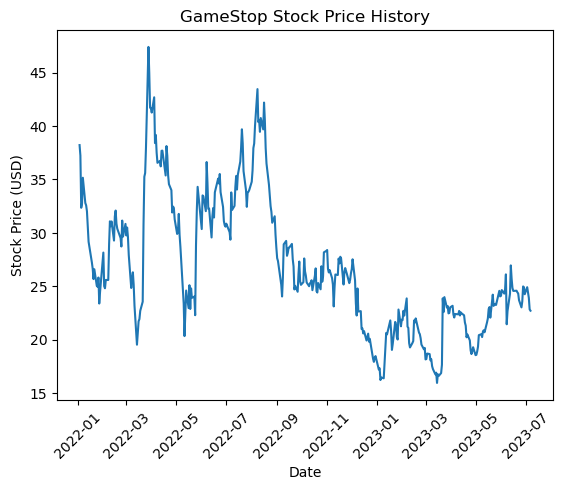

In [50]:
# Plotting the graph
plt.plot(gme_data['Date'], gme_data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('GameStop Stock Price History')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.show()